# Project 2: Sentiments Classifier
## by Emmanuel Paredes Rocha

This is the final project by de course <a href="https://www.coursera.org/learn/python-functions-files-dictionaries">Python Functions, Files and Dictionaries</a> offered by the University of Michigan through coursera.org

This project has the task to build a sentiment classifier for tweets, which will detect how positive or negative each one is. Some synthetic (fake, semi-randomly generated) twitter data is provided in a CSV file named 'project_twitter_data.csv' which has the text of a tweet, the number of retweets of that tweet, and the number of replies to that tweet. Additionally the project offer a list of words that express positive sentiment and negative sentiment, and these words are stored in the files 'positive_words.txt' and 'negative_words.txt', respectively. These three files are provided by the course staff. On this project, one must create a CSV file which contains columns for the Number of Retweets, Number of Replies, Positive Score (which is how many happy words are in the tweet), Negative Score (which is how many angry words are in the tweet), and the Net Score (Positive score minus Negative score) for each tweet. At the end, one must produce a graph of the Net Score vs Number of Retweets.

**To overcome the project's task, I follow the next steps:**


*   First, define a function to strip the words from the popular punctuation  signs on Twitter, like #hastags, @usernames and others. **strip_punctuation()** function. 
*   Second, obtain the word in a list that reflect positive or negative sentiments from the provided files. **positive_words** and **negative_words** lists.
*   Third, define functions to obtain the total number of positive words or negative words in the text of a tweet. With these numbers, the positive score or negative score is assigned. **get_pos()** and **get_neg()** functions
*   Fourth, from each tweet data provided, I get the positive score (pos_score with get_pos function), the negative score (neg_score with get_neg function) and the net score from the text tweet, once each word for the text was stripped.
*   Finally, I plot a scatter plot of Net Score vs Number of Retweets and Net Score vs Number of Replies.





With this project, I obtained my <a href="https://www.coursera.org/account/accomplishments/verify/Z574GKKTJ46B">course certification</a>, showing my abilities manage files with data information, without modules, with python.

**Requiered files:**
*  positive_words.txt
*  negative_wrods.txt
*  project_twitter_data.csv

In [3]:
import matplotlib.pyplot as plt #to generate a scatter plot
#### Function Definitions

#function to strip the words from punctuation signs
punctuation_chars = ['#', '@',"'", '"', ",", ".", "!", ":", ";"] #populr punctuation signs in tweets
def strip_punctuation(word):
  '''Function to strip the strip one word from the punctuation signs
  not matter how many there are'''
    for char in word: #character by character
        if char in punctuation_chars:
            word = word.replace(char,'') #delete the character  punctuation sign
    return word

## lists of positive and negative words to use
#this block extract the positive words like a list from the file text 'positive_words.txt'
positive_words = []
with open("positive_words.txt") as pos_f:
    for lin in pos_f:
        if lin[0] != ';' and lin[0] != '\n': #signs to ignore the lines with single words, check the file
            positive_words.append(lin.strip())
#to extract negative words like a list from 'negative_words.txt' similar to the positive ones
negative_words = []
with open("negative_words.txt") as pos_f:
    for lin in pos_f:
        if lin[0] != ';' and lin[0] != '\n':
            negative_words.append(lin.strip())


## functions to obtain the number of positive and negative words from one sentence
#function to get the positive words
def get_pos(str1):
  '''function to obtain the total number of postive words from the string/sentence 'str1'
  once each word is stripped from punctuation signs with strip_punctuation function.
  The positive words are obtained from the file "positive_words.txt".'''
  tot_pos_words = 0
  for word in str1.split(): #split generates a list with each word of the sentence
    if strip_punctuation(word).lower() in positive_words: #verify if the stripped word is in positive_words list. Always lower case for words
      tot_pos_words += 1
  return tot_pos_words
#function to get the negative words
def get_neg(str1):
  '''function to obtain the total number of negative words from the string/sentence 'str1'
  once each word is stripped from punctuation signs with strip_punctuation function.
  The negative words are obtained from the file "negative_words.txt".'''
  tot_neg_words = 0    
  for word in str1.split():
    if strip_punctuation(word).lower() in negative_words:
      tot_neg_words += 1            
  return tot_neg_words

In [4]:
#Open the file with the data Tweets
with open('project_twitter_data.csv','r') as datafile:
    
    #Open the file to save the data for each tweet
    #order: Number of Retweets, Number of Replies, Positive Score, Negative Score, Net Score
    with open('resulting_data.csv','w') as datasave:
        #headers
        datasave.write('Number of Retweets, Number of Replies, Positive Score, Negative Score, Net Score\n')
        for data_row_tw in datafile.readlines()[1:]:
            data_tw = data_row_tw.split(',') #cvs format. Order: tweet_text, number_of_retweets, number_of_replies   
            pos_score = get_pos(data_tw[0]) #get the number of positive words from the tweet text (data_tw[0])
            neg_score = get_neg(data_tw[0]) #get the number of negative words from the tweet text
            output = data_tw[1] + ',' + data_tw[2].replace('\n','') + ',' \
            + str(pos_score) + ',' + str(neg_score) + ',' \
            + str(pos_score-neg_score) + '\n' #save the results according to the headers, Net_score = pos_score - neg_score
            datasave.write(output)


In [29]:
## To make the requested graph
#To extract the data from the resulting_data.cvs file to previus operation cell code
with open('resulting_data.csv','r') as plot_f:
  num_rt = []
  num_rplay = []
  pos_score = []
  neg_score = []
  net_score = []
  for lin in plot_f.readlines()[1:]:
    dat = lin.split(',') #csv format
    num_rt.append(int(dat[0])) #save the data like integer
    num_rplay.append(int(dat[1]))
    pos_score.append(int(dat[2]))
    neg_score.append(int(dat[3]))
    net_score.append(int(dat[4]))

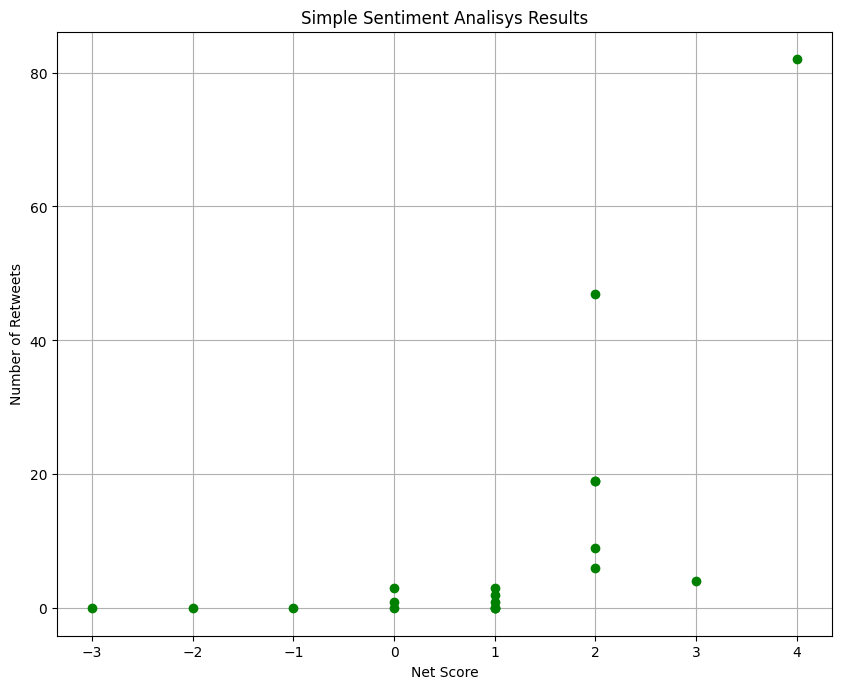

In [30]:
# Simple Scatterplot
plt.plot(net_score, num_rt, 'go')
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Simple Sentiment Analisys Results')
plt.xlabel('Net Score')
plt.ylabel('Number of Retweets')
plt.grid(True)
plt.show()

**The graph of the results shows us that if the tweet has a greater number of positive words, which express positive sentiments, a greater number of retweets is obtained in most cases, and therefore greater impact has the tweet.**

**Another measure, less effective, of impact of the tweet may be the number of responses that gets. This number maintains the same trend as the number of retweets (see the below graph)**

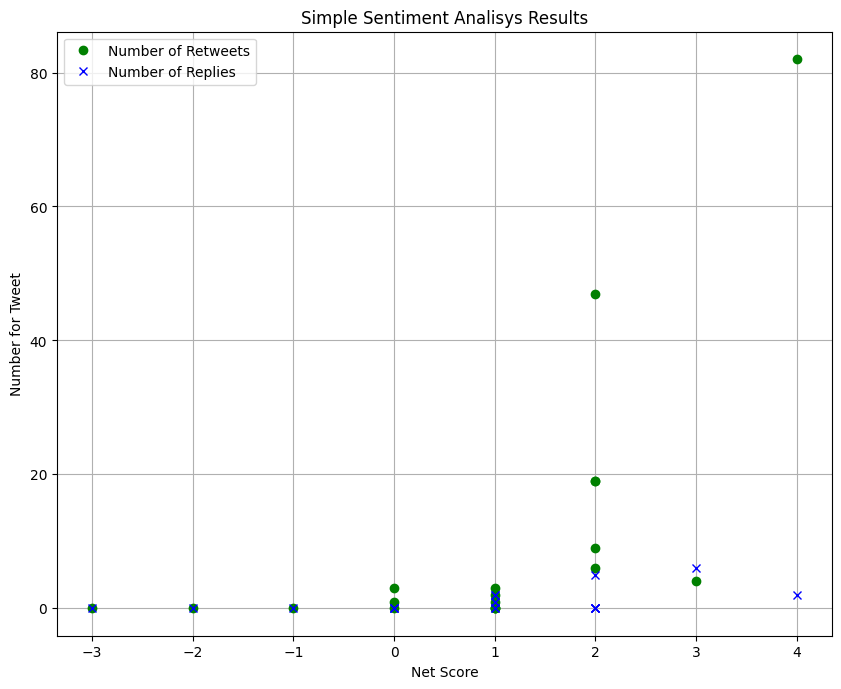

In [31]:
# Simple Scatterplot
plt.plot(net_score, num_rt, 'go', label=f'Number of Retweets')
plt.plot(net_score, num_rplay, 'bx', label=f'Number of Replies')
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Simple Sentiment Analisys Results')
plt.xlabel('Net Score')
plt.ylabel('Number for Tweet')
plt.grid(True)
plt.legend()
plt.show()